In [1]:
import random
import copy

import numpy as np

from numba import jit, njit, cuda, prange

import matplotlib.pyplot as plt

# Random Walker With Pure Python

In [294]:
steps = int(1e5)

In [296]:
X = [0]*(steps+1)
T = [i for i in range(steps + 1)]

In [298]:
for i in range(steps):
    rand = random.uniform(0, 1) - 0.5
    rand /= abs(rand)

    X[i+1] = X[i] + rand

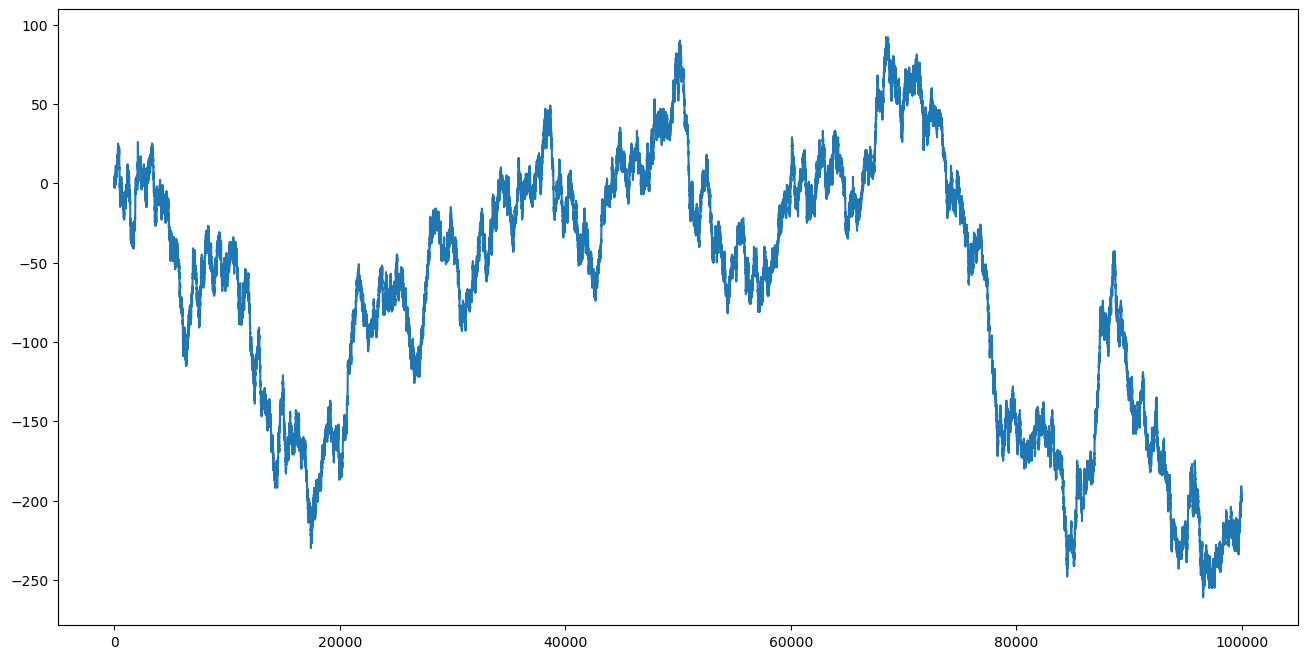

In [300]:
plt.figure(figsize = (16, 8))
plt.plot(T, X)
plt.show()

# 1D Random Walker With Numpy

In [366]:
generator = np.random.default_rng()
n_steps = int(4e7)

In [368]:
steps = generator.random(n_steps) - 0.5
steps /= np.abs(steps)

In [370]:
T = np.arange(n_steps + 1)
X = np.insert(np.cumsum(steps), 0, 0)

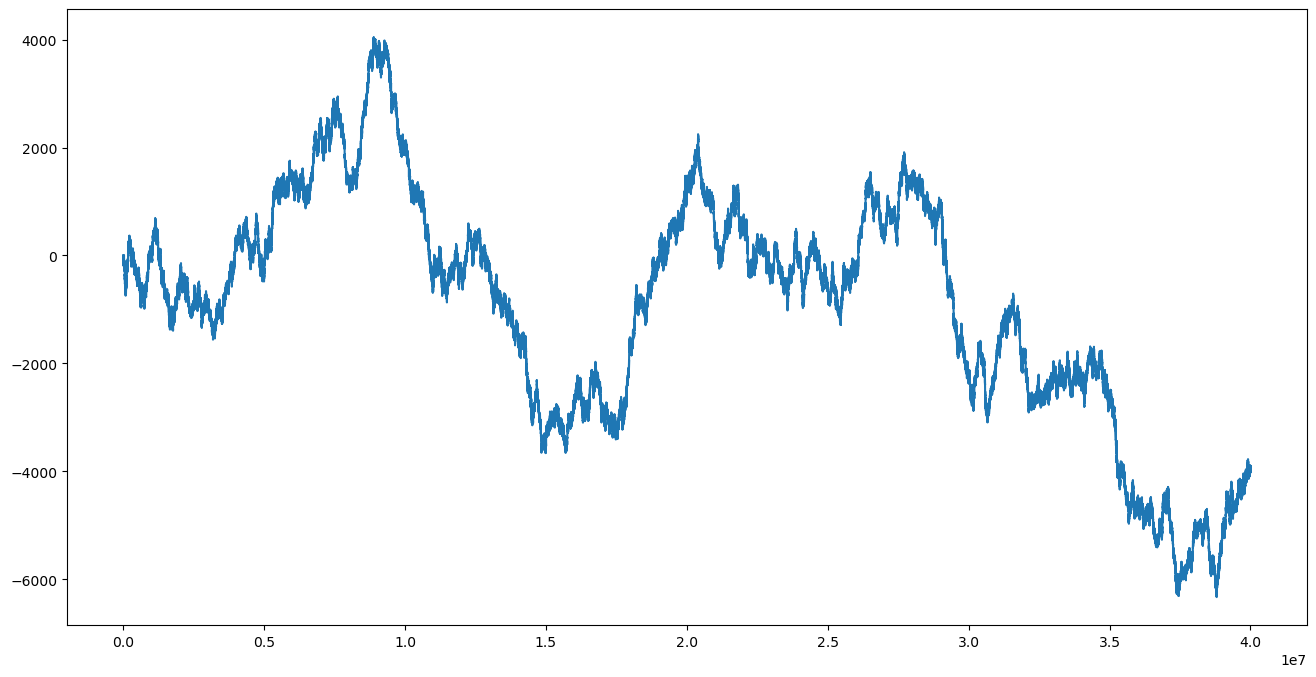

In [372]:
plt.figure(figsize = (16, 8))
plt.plot(T, X)
plt.show()

# 1D Random Walker With Numba

In [384]:
@jit(target_backend='cuda')
def random_walker(steps):

    steps = int(steps)
    
    X = [0]*(steps+1)
    T = [i for i in range(steps + 1)]
    
    for i in range(steps):
        rand = random.uniform(0, 1) - 0.5
        rand /= abs(rand)
    
        X[i+1] = X[i] + rand

    return X, T

In [396]:
X, T = random_walker(5e7)

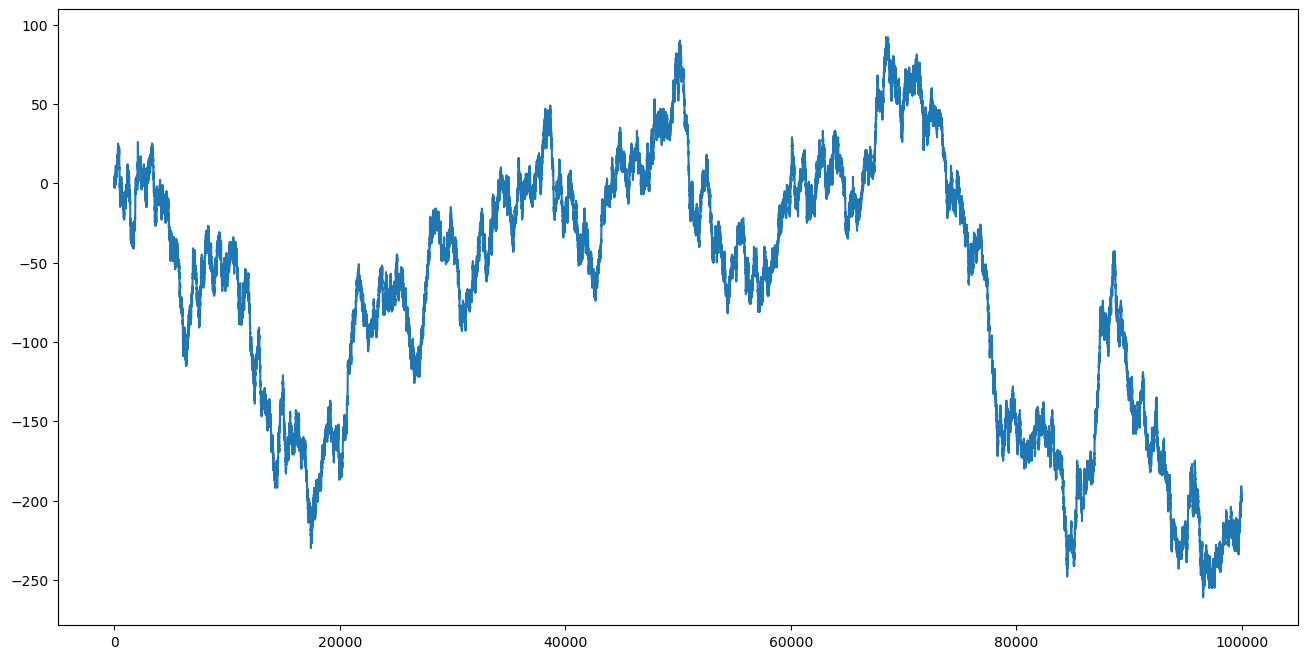

In [300]:
plt.figure(figsize = (16, 8))
plt.plot(T, X)
plt.show()

# N-1D Random Walkers With Pure Python

In [483]:
walkers = int(5e2)
steps = int(1e4)

In [485]:
T = [i for i in range(steps + 1)]

In [487]:
random_walks = []
for j in range(walkers):

    X = [0]*(steps+1)
    
    for i in range(steps):
        rand = random.uniform(0, 1) - 0.5
        rand /= abs(rand)
    
        X[i+1] = X[i] + rand
    
    random_walks.append(X)

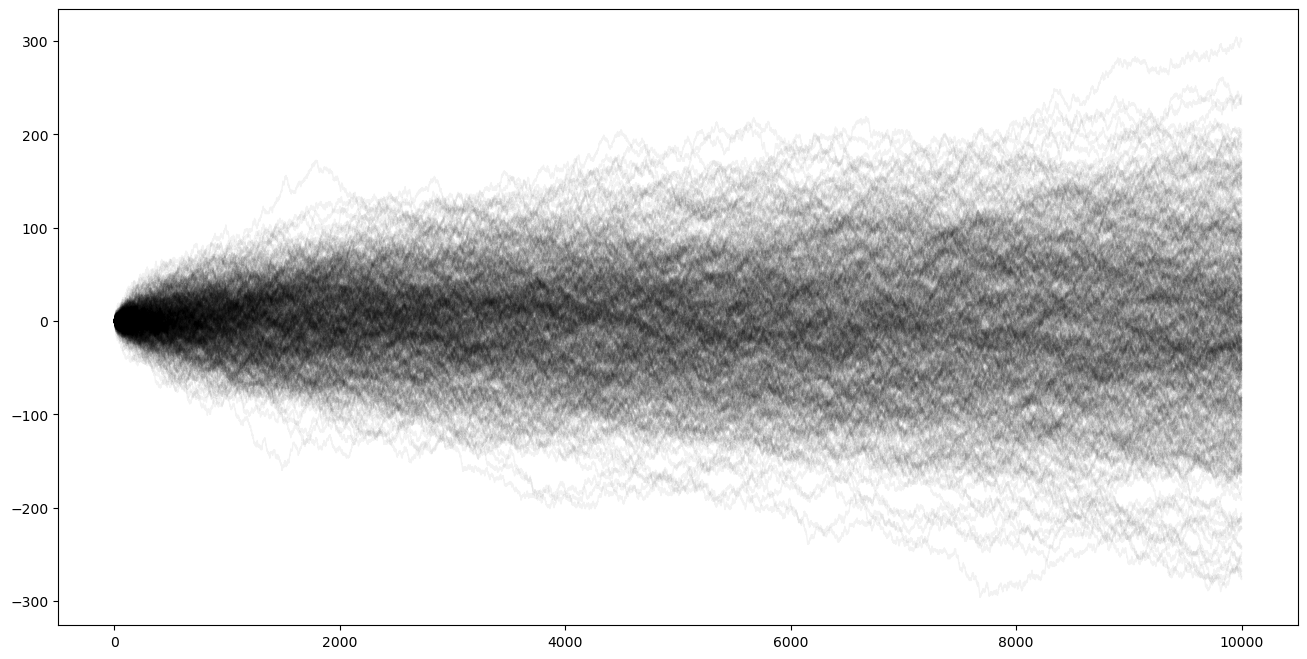

In [491]:
plt.figure(figsize = (16, 8))

for i in range(walkers):
    plt.plot(T, random_walks[i], c='k', linewidth=1, alpha=0.05)

plt.show()

# N-1D Random Walkers With Numpy

In [778]:
generator = np.random.default_rng()
walkers = int(5e3)
n_steps = int(1e3)

In [780]:
steps = generator.random((walkers, n_steps)) - 0.5
steps /= np.abs(steps)

In [782]:
T = np.arange(n_steps + 1)
X = np.insert(np.cumsum(steps, axis=1), 0, 0, axis=1)

In [784]:
mean_pos = np.mean(X, axis=0)
mean_squared_dis = np.mean(X**2, axis=0)
print(f'Mean of Mean Positions At Each Time Step = {mean_pos.mean()}')

Mean of Mean Positions At Each Time Step = 0.26611428571428575


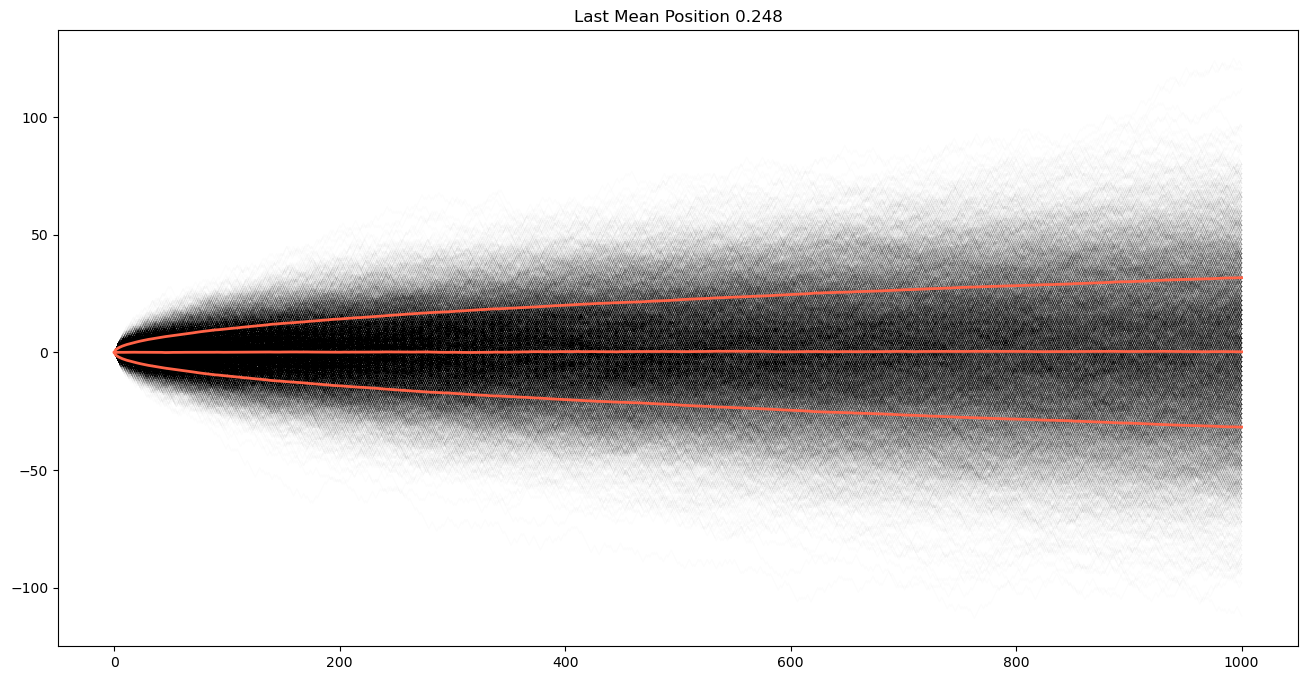

In [814]:
plt.figure(figsize = (16, 8))

for i in range(walkers):
    plt.plot(T, X[i], c='k', linewidth=1, alpha=0.01)

plt.plot(T, mean_pos, c='tomato', linewidth=2)
plt.plot(T, np.sqrt(mean_squared_dis), c='tomato', linewidth=2)
plt.plot(T, -np.sqrt(mean_squared_dis), c='tomato', linewidth=2)

plt.title(f'Last Mean Position {np.round(mean_pos[-1], 3)}')
plt.show()

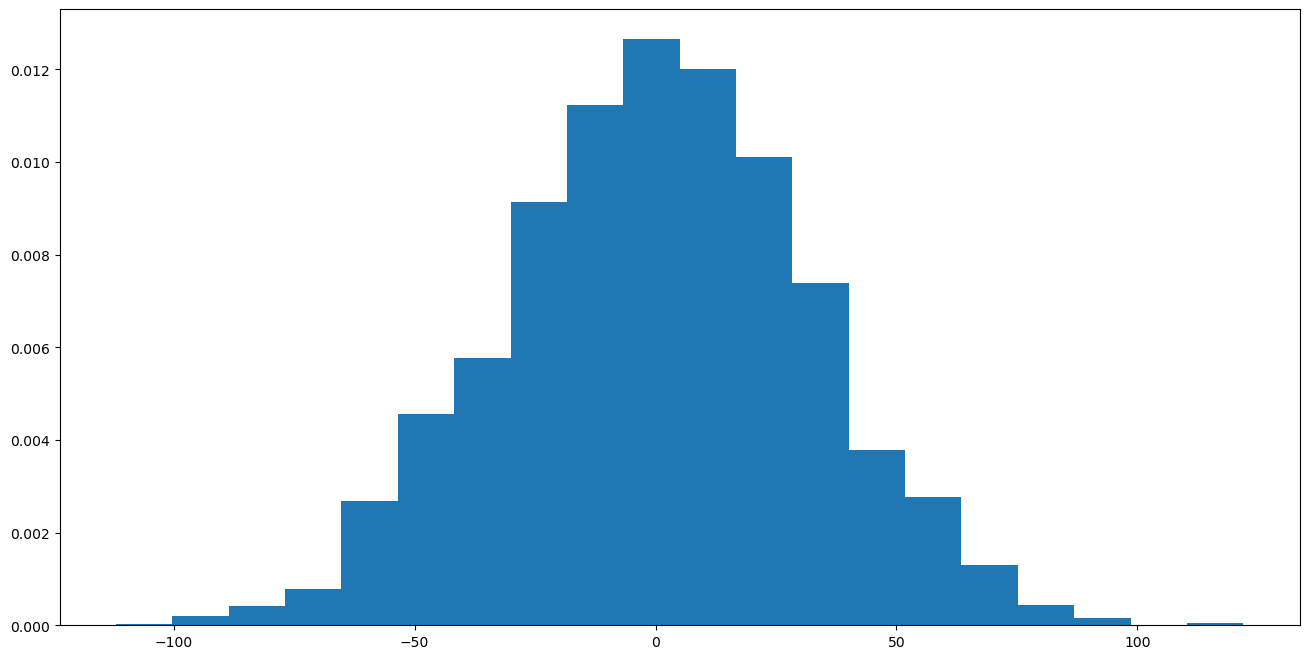

In [796]:
plt.figure(figsize = (16, 8))
plt.hist(X[:, -1], density=True, bins=20)
plt.show()

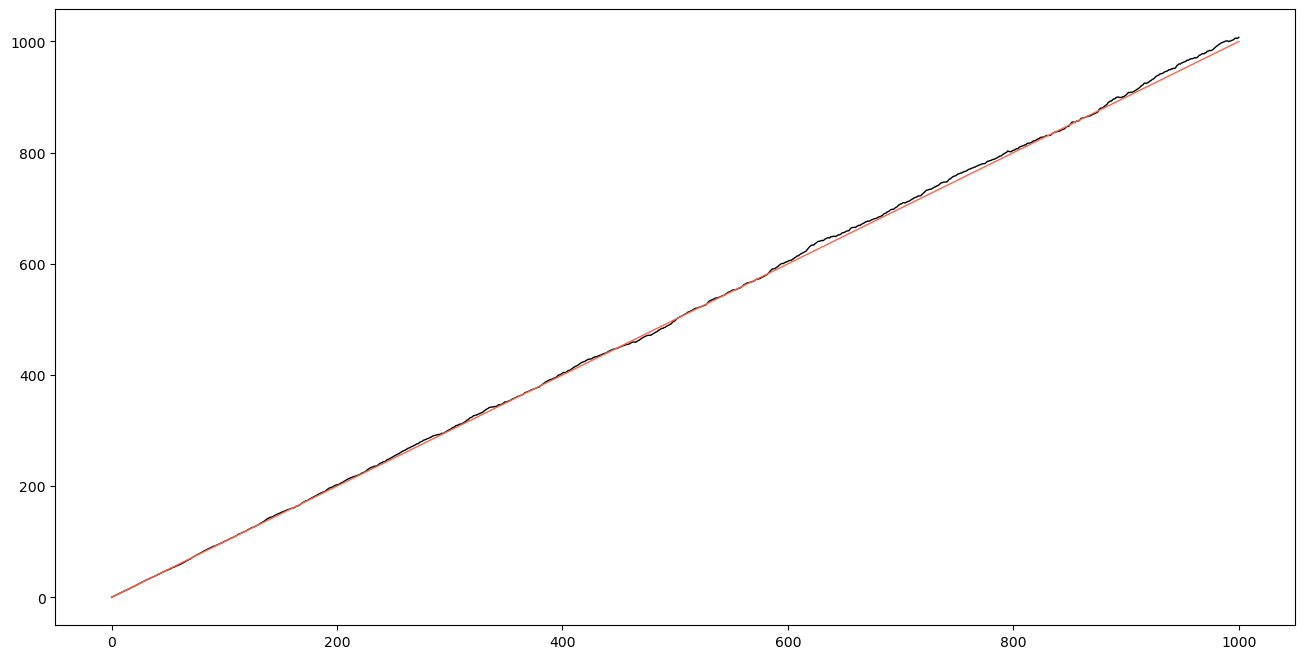

In [804]:
plt.figure(figsize = (16, 8))
plt.plot(T, mean_squared_dis, c='black', linewidth=1, label='Mean Squared Displacement Per Time Step')
plt.plot(T, T, linewidth=1, c='tomato', label='y=x')
plt.show()

# N-1D Random Walkers With Numba

In [12]:
#@jit(target_backend='cuda') for nvidia graphic card
@jit
def random_walkers(walkers, steps):

    walkers = int(walkers)
    steps = int(steps)
    
    T = [i for i in range(steps + 1)]
    
    random_walks = []
    for j in range(walkers):
    
        X = [0]*(steps+1)
        
        for i in range(steps):
            rand = random.uniform(0, 1) - 0.5
            rand /= abs(rand)
        
            X[i+1] = X[i] + rand
        
        random_walks.append(X)

    return random_walks, T

In [16]:
walkers = 5e3
n_steps = 1e3
X, T = random_walkers(walkers, n_steps)

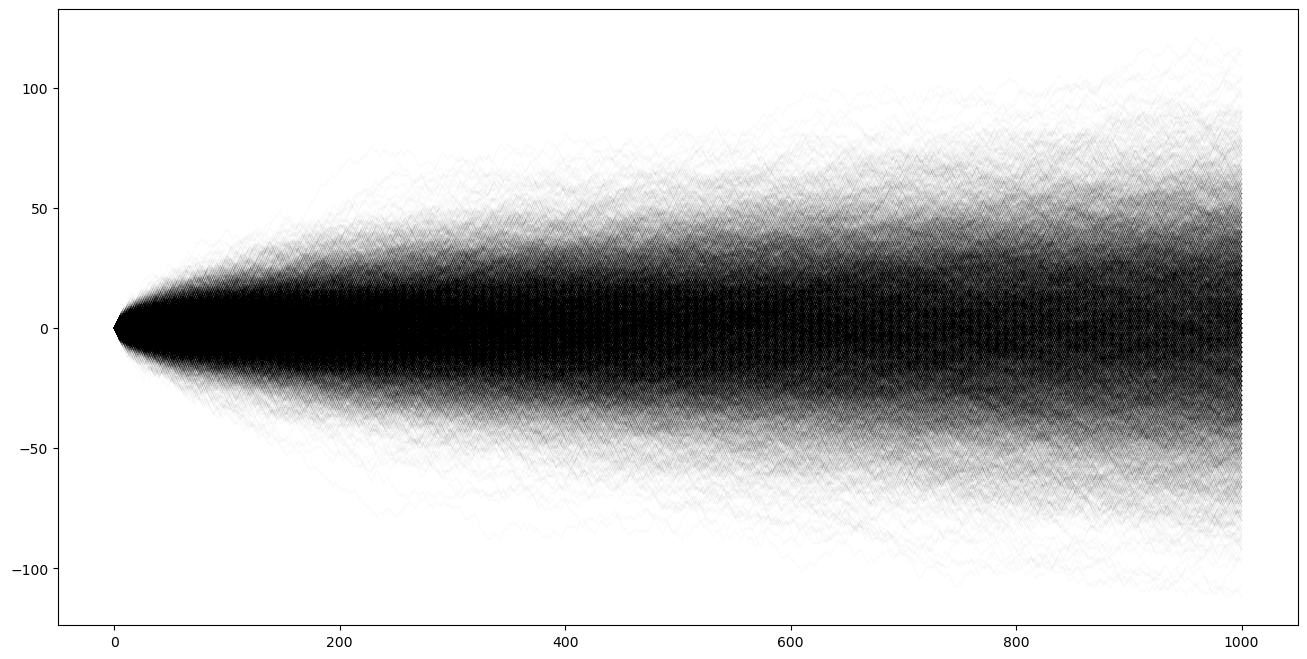

In [18]:
plt.figure(figsize = (16, 8))

for i in range(int(walkers)):
    plt.plot(T, X[i], c='k', linewidth=1, alpha=0.02)

plt.show()

# N-2D Random Walkers With Numpy

In [747]:
generator = np.random.default_rng()
walkers = int(5e3)
n_steps = int(2e3)

In [749]:
steps = generator.random((walkers, n_steps, 2)) - 0.5
steps /= np.abs(steps)

In [750]:
T = np.arange(n_steps + 1)
X = np.insert(np.cumsum(steps, axis=1), 0, 0, axis=1)

In [752]:
x_mean_pos = np.mean(X, axis=0)[:, 0]
y_mean_pos = np.mean(X, axis=0)[:, 1]
mean_squared_dis = np.mean(np.sum(X**2, axis=2), axis=0)
print(f'Mean of Mean Positions At Each Time Step for X = {x_mean_pos.mean()}')
print(f'Mean of Mean Positions At Each Time Step for Y = {y_mean_pos.mean()}')

Mean of Mean Positions At Each Time Step for X = 0.3796587706146926
Mean of Mean Positions At Each Time Step for Y = 0.14463328335832085


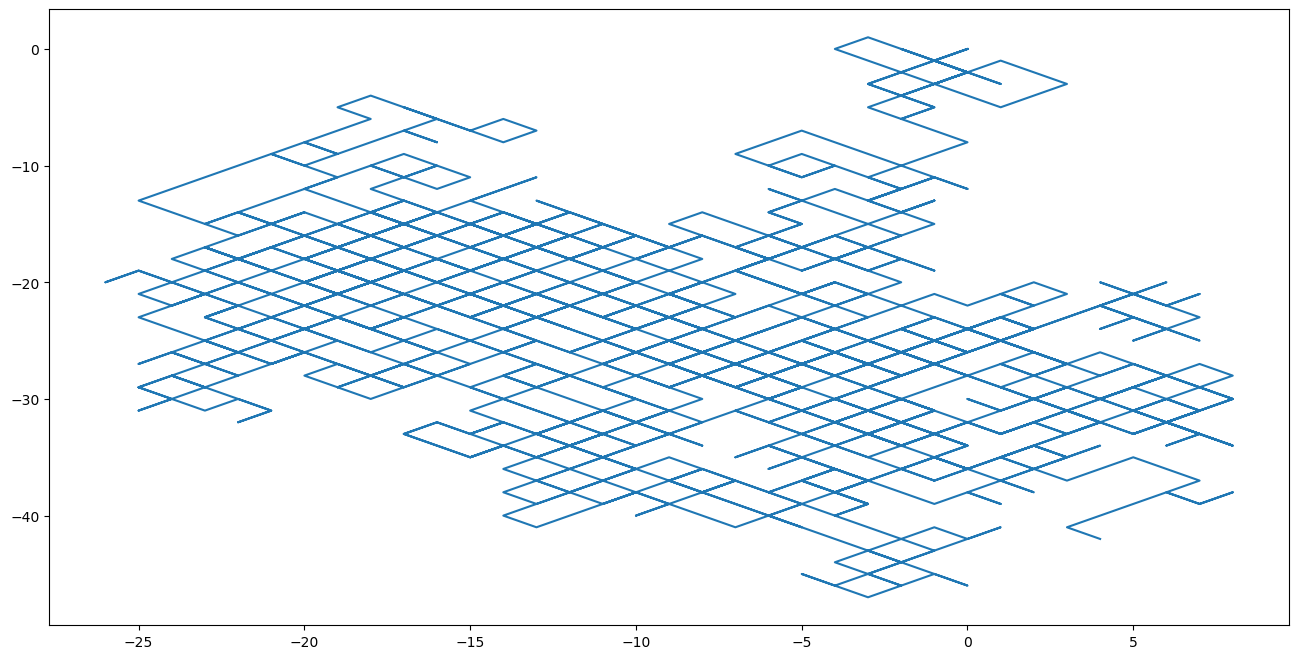

In [754]:
walker_id = 0
plt.figure(figsize = (16, 8))

plt.plot(X[walker_id,:,0], X[walker_id,:,1])

plt.show()

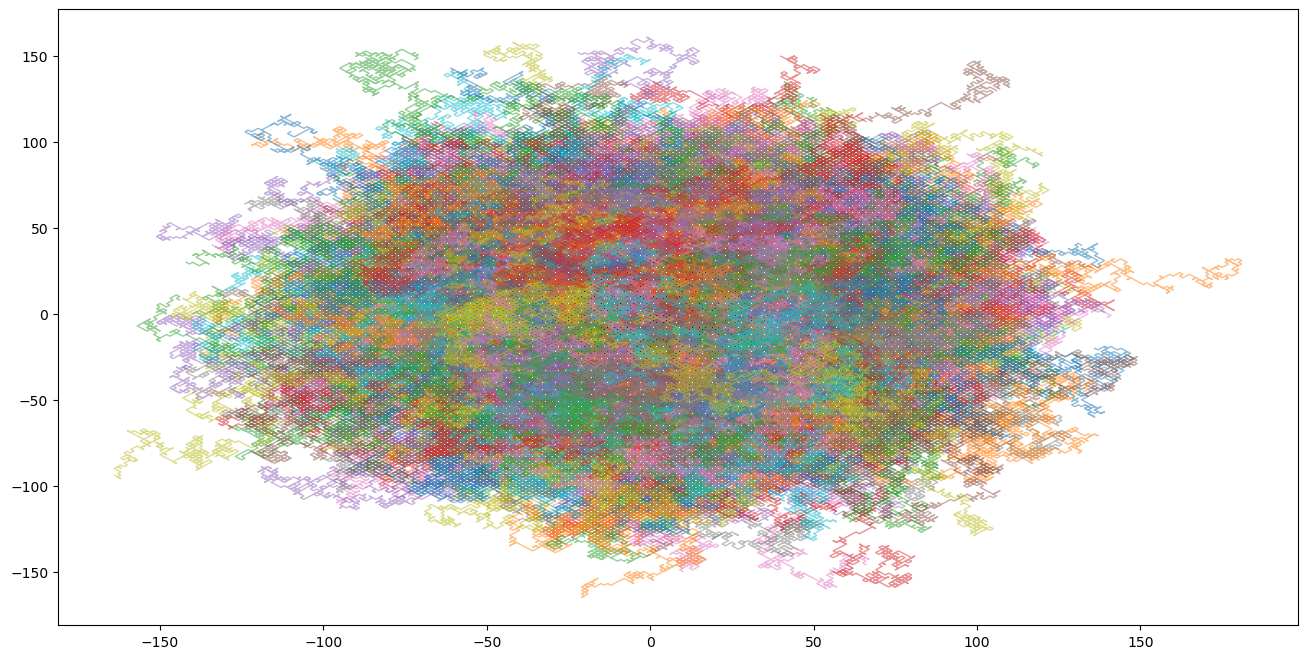

In [755]:
plt.figure(figsize = (16, 8))

for i in range(walkers):
    
    plt.plot(X[i,:,0], X[i,:,1], linewidth=1, alpha=0.5)

plt.show()

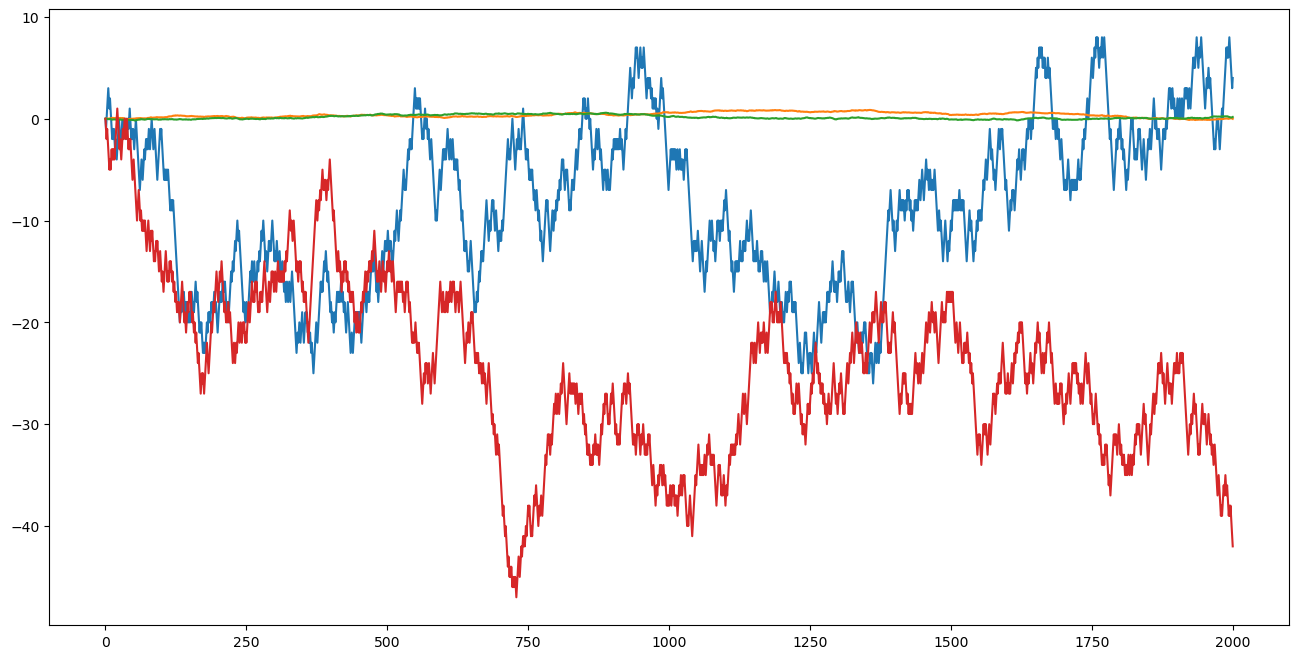

In [757]:
plt.figure(figsize = (16, 8))

plt.plot(T, X[0,:,0])
plt.plot(T, x_mean_pos)

plt.plot(T, y_mean_pos)
plt.plot(T, X[0,:,1])

plt.show()

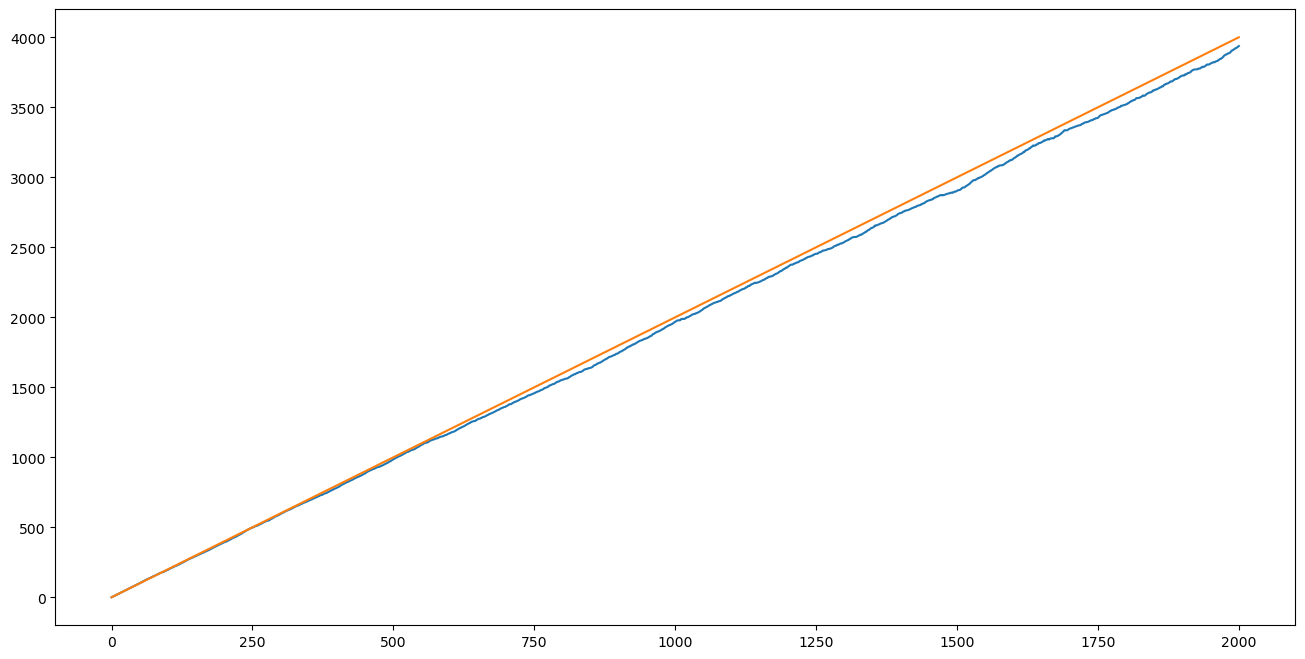

In [759]:
plt.figure(figsize = (16, 8))

plt.plot(T, (X**2).sum(axis=2).mean(axis=0))
plt.plot(T, 2*T)

plt.show()

In [760]:
steps_to_reach_zero = np.zeros(walkers)

for i in range(walkers):
    
    steps_to_reach_zero[i] = np.count_nonzero(np.prod(X[i] == [0, 0], axis=1)) - 1

In [761]:
unique_steps_to_reach_zero = np.unique(steps_to_reach_zero)
appearances_to_reach_zero = np.zeros(len(unique_steps_to_reach_zero))

for i in range(len(unique_steps_to_reach_zero)):
    
    appearances_to_reach_zero[i] = len(steps_to_reach_zero[steps_to_reach_zero == unique_steps_to_reach_zero[i]])

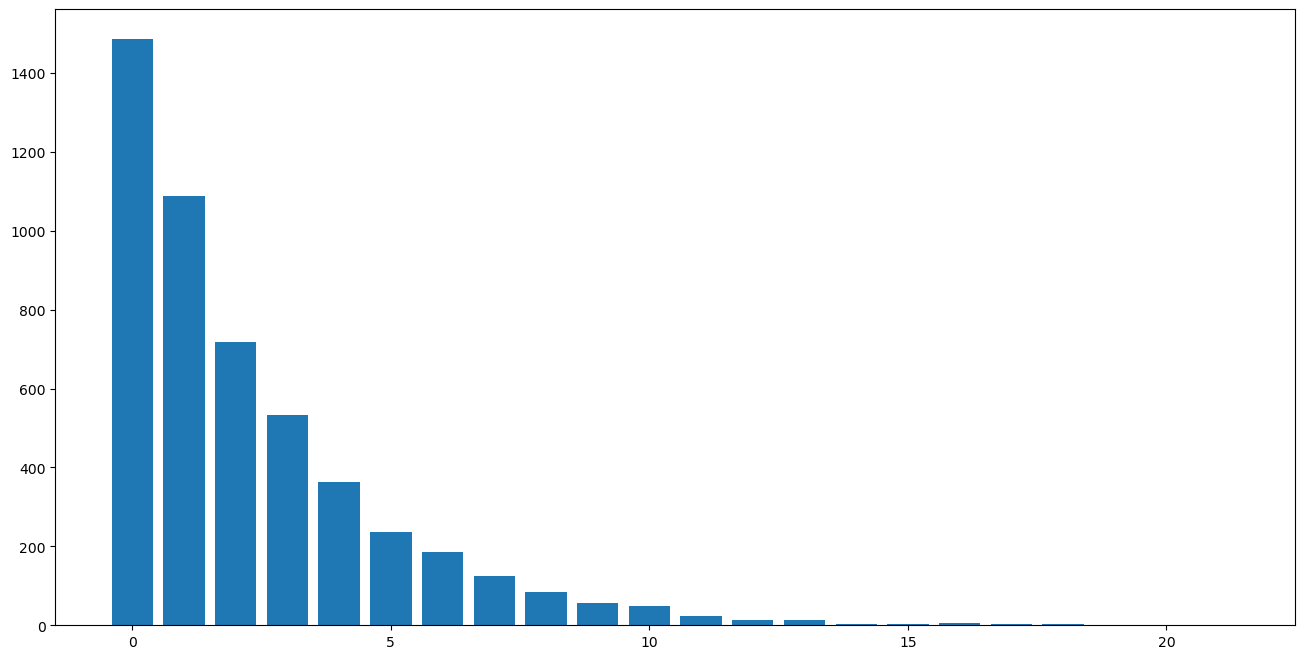

In [762]:
plt.figure(figsize = (16, 8))
plt.bar(x=unique_steps_to_reach_zero, height=appearances_to_reach_zero)
plt.show()

# N-2D Random Walkers With Python & Numba

In [791]:
walkers = int(5e2)
steps = int(1e4)

In [793]:
T = [i for i in range(steps + 1)]

In [795]:
random_walks = []
for j in range(walkers):

    X = [0]*(steps+1)
    Y = [0]*(steps+1)
    
    for i in range(steps):
        
        X_rand = random.uniform(0, 1) - 0.5
        X_rand /= abs(X_rand)
        
        Y_rand = random.uniform(0, 1) - 0.5
        Y_rand /= abs(Y_rand)
        
    
        X[i+1] = X[i] + X_rand
        Y[i+1] = Y[i] + Y_rand
    
    random_walks.append([X, Y])

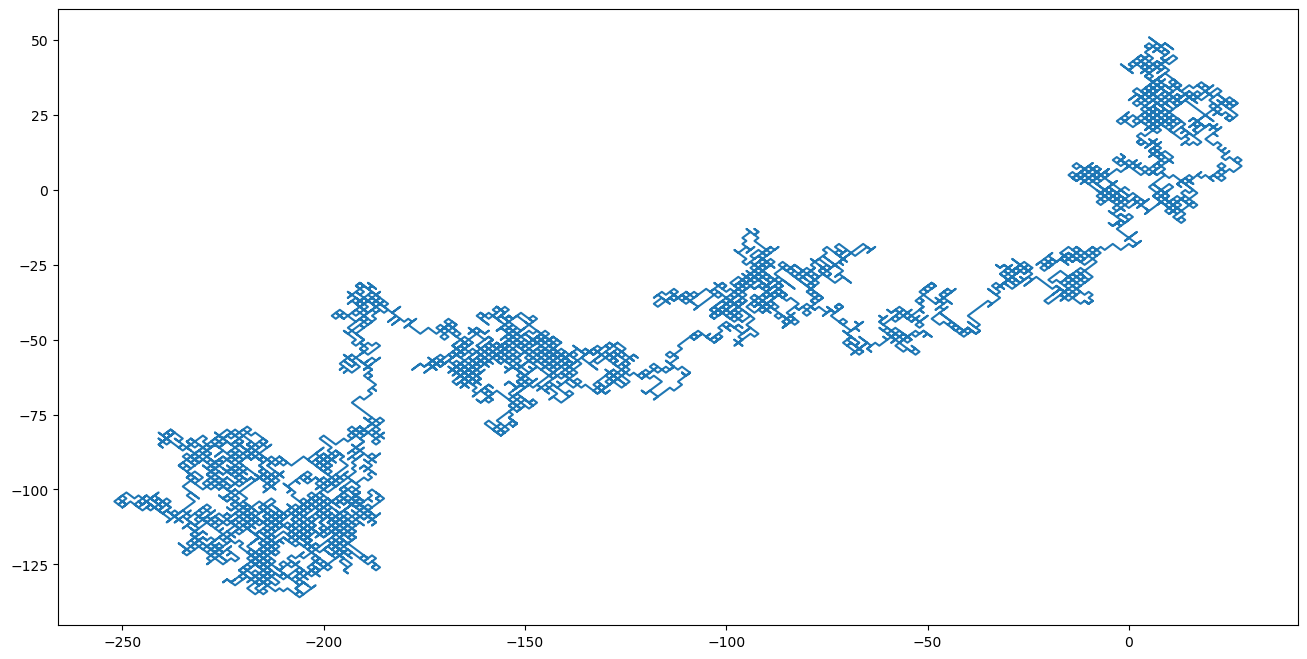

In [797]:
plt.figure(figsize = (16, 8))

plt.plot(random_walks[0][0], random_walks[0][1])

plt.show()

# N-2D Random Walkers With Python & Numba - Stop When Origin is Reached

In [34]:
walkers = int(5e3)
n_steps = int(2e3)

In [36]:
T = [i for i in range(n_steps + 1)]

In [38]:
random_walks = []
steps_to_reach_zero = []
for j in range(walkers):

    X = [0]
    Y = [0]

    x = 0
    y = 0
    
    for i in range(n_steps):
        
        X_rand = random.uniform(0, 1) - 0.5
        X_rand /= abs(X_rand)
        x += X_rand
        
        Y_rand = random.uniform(0, 1) - 0.5
        Y_rand /= abs(Y_rand)
        y += Y_rand
        
        X.append(x)
        Y.append(y)

        if (x, y) == (0, 0):
            steps_to_reach_zero.append(i+1)
            break
    
    random_walks.append([X, Y])

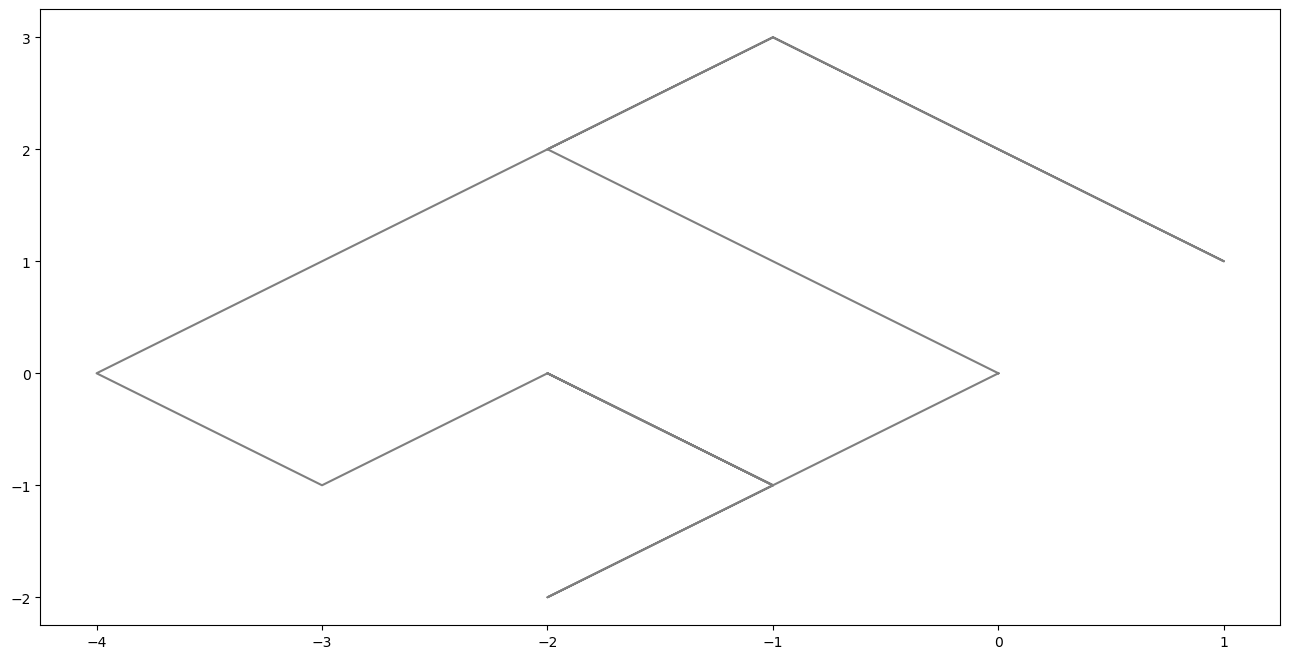

In [78]:
walker = 2
plt.figure(figsize = (16, 8))

plt.plot(random_walks[walker][0], random_walks[walker][1], c='k', alpha=0.5)

plt.show()

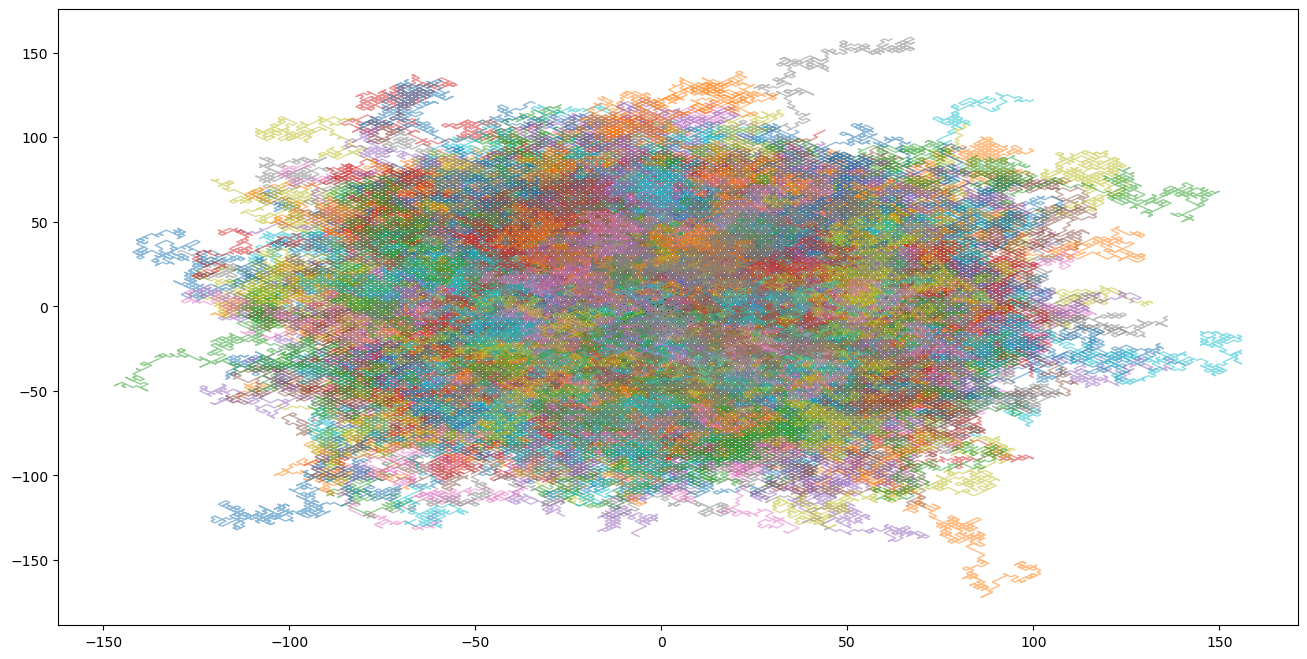

In [44]:
plt.figure(figsize = (16, 8))

for i in range(walkers):
    plt.plot(random_walks[i][0], random_walks[i][1], linewidth=1, alpha=0.5)

plt.show()

In [46]:
steps_to_reach_zero = np.array(steps_to_reach_zero)
unique_steps_to_reach_zero = np.unique(steps_to_reach_zero)
appearances_to_reach_zero = np.zeros(len(unique_steps_to_reach_zero))

for i in range(len(unique_steps_to_reach_zero)):
    
    appearances_to_reach_zero[i] = len(steps_to_reach_zero[steps_to_reach_zero == unique_steps_to_reach_zero[i]])

In [48]:
np.mean(steps_to_reach_zero)

97.32570774949957

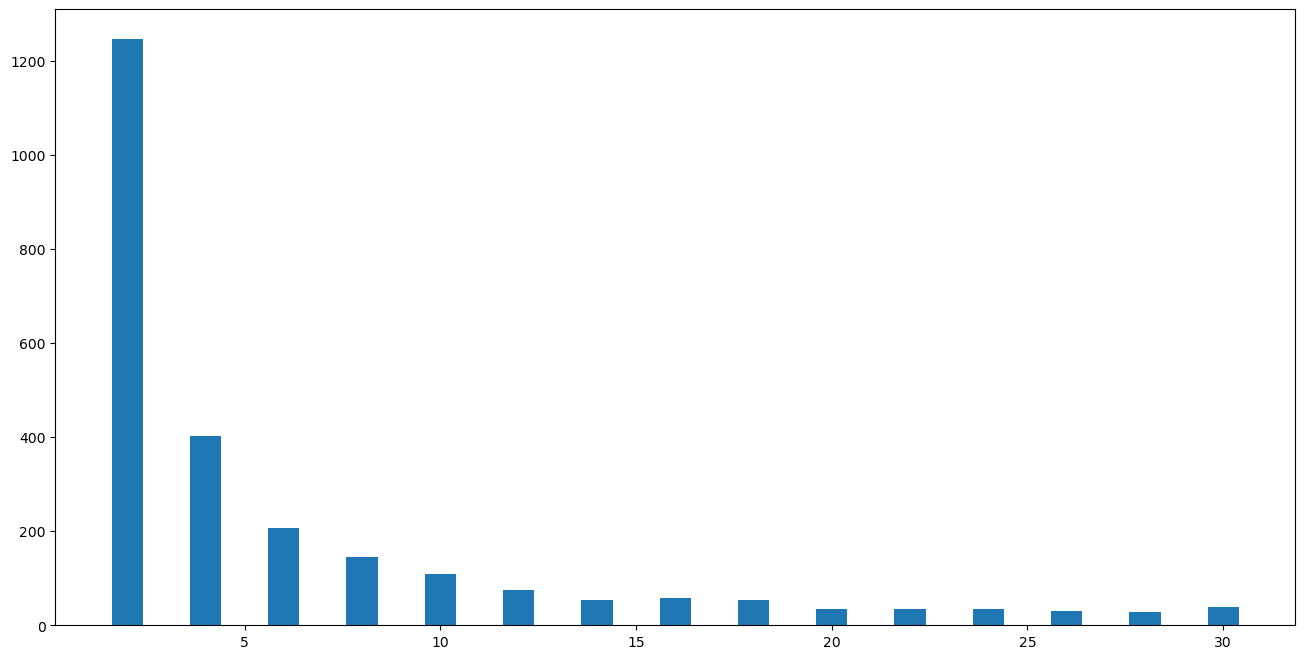

In [50]:
plt.figure(figsize = (16, 8))
plt.bar(x=unique_steps_to_reach_zero[0:15], height=appearances_to_reach_zero[0:15])
plt.show()

In [76]:
len(random_walks[2][1])

19

# N-1D Random Walkers With Python & Numba - Difussion Across A Synapse

$t = \frac{L^{2}}{D}$ <br>
$D$: Difussion Coefficient $(\mu m^{2}/s)$ <br>
$L$: Length $(\mu m)$ <br>
$t$: Time $(s)$

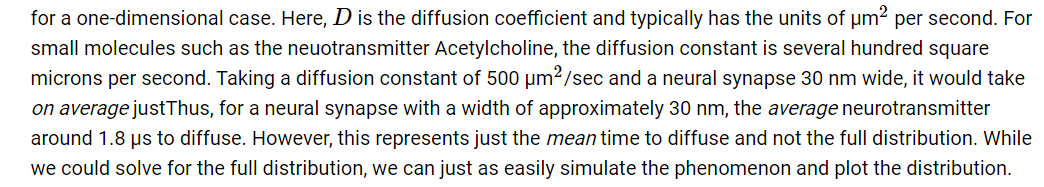

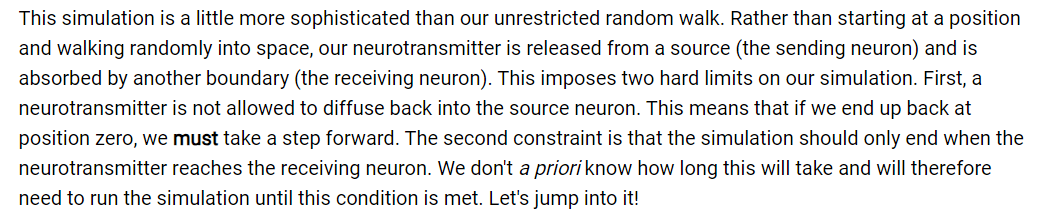

In [24]:
D = 500 # Diffusion Constant
L = 0.03 # Width Of The Neurotransmitter

dt = 1e-9 # Time-Step In Nanoseconds

L_dt = np.sqrt(D*dt) # Average Distance Traveled Per Time Step

length = int(L/L_dt) # Steps to cross the whole synapse

In [36]:
walkers = int(1e4)

In [38]:
random_walks = []
steps_to_cross_synapse = []

for j in range(walkers):

    T = [0]
    
    X = [0]
    x = 0

    i = 0
    
    while x < length:

        i += 1
        T.append(i+1)

        if x == 0:
            x += 1
        else:
            X_rand = random.uniform(0, 1) - 0.5
            X_rand /= abs(X_rand)
            x += X_rand
        
        X.append(x)

    steps_to_cross_synapse.append(i)
    random_walks.append([T, X])

In [39]:
steps_to_cross_synapse = np.array(steps_to_cross_synapse)
time_to_cross_synapse = steps_to_cross_synapse*dt*(1e6)
print(f"On average it took {np.round(np.mean(time_to_cross_synapse), 3)} microseconds to cross the synapse")

On average it took 1.792 microseconds to cross the synapse


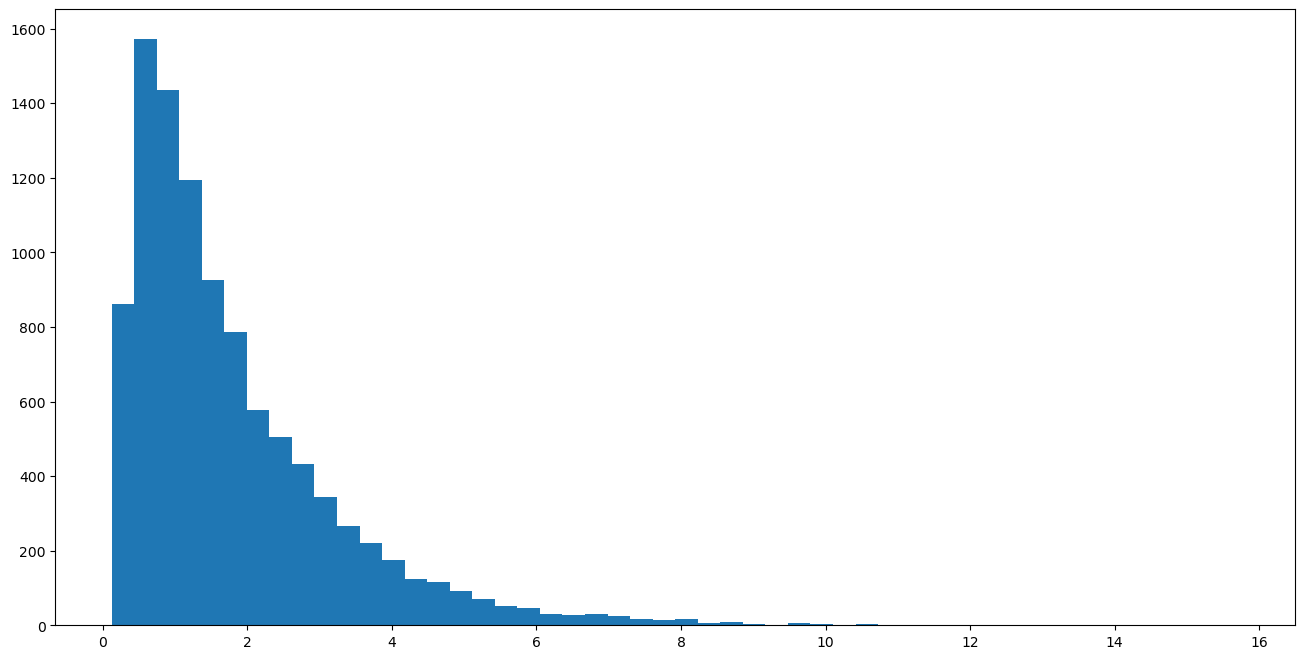

In [40]:
plt.figure(figsize = (16, 8))

plt.hist(time_to_cross_synapse, bins=50)

plt.show()

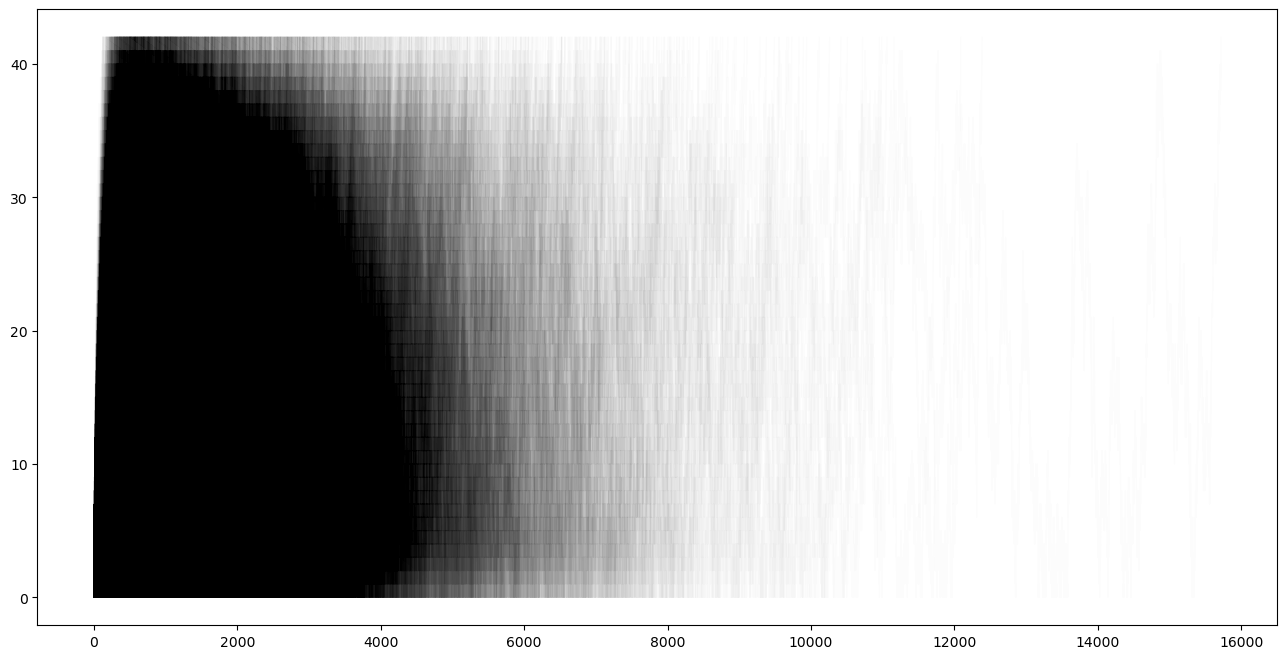

In [41]:
plt.figure(figsize = (16, 8))

for i in range(walkers):
    plt.plot(random_walks[i][0], random_walks[i][1], c='k', linewidth=1, alpha=0.01)

plt.show()

# Self Avoiding

In [31]:
grid_size = int(1e4)
max_steps = int(3e4)
walkers = int(3e3)

In [33]:
random_walks = []

for j in range(walkers):
    grid = np.zeros((grid_size+1, grid_size+1))
    grid[:, 0] = True
    grid[:, -1] = True
    grid[0, :] = True
    grid[-1, :] = True
    grid[int(grid_size/2), int(grid_size/2)] = True
    
    x, y = int(grid_size/2), int(grid_size/2)
    idx, idy = copy.copy(x), copy.copy(y)
    X = [x]
    Y = [y]
    T = [0]
    
    for i in range(max_steps):
    
        if (grid[idx+1, idy+1] == 1) & (grid[idx+1, idy-1] == 1) & (grid[idx-1, idy+1] == 1) & (grid[idx-1, idy-1] == 1):
            break
        
        while grid[idx, idy] == 1:
    
            idx, idy = copy.copy(x), copy.copy(y)
            
            X_rand = random.uniform(0, 1) - 0.5
            X_rand /= abs(X_rand)
            idx += int(X_rand)
        
            Y_rand = random.uniform(0, 1) - 0.5
            Y_rand /= abs(Y_rand)
            idy += int(Y_rand)
    
        x = copy.copy(idx)
        y = copy.copy(idy)
        X.append(x)
        Y.append(y)
        T.append(i+1)
    
        grid[x, y] = True

    del grid
    random_walks.append([T, X, Y])

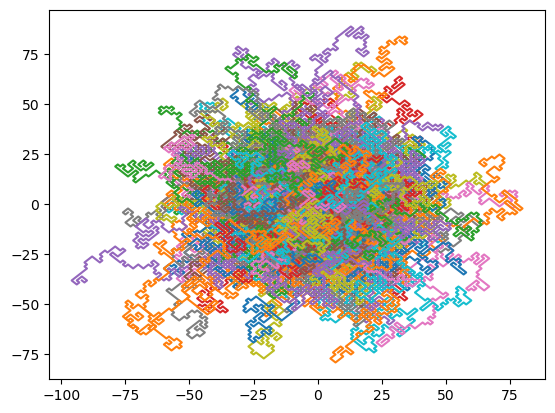

In [34]:
plt.figure(figsize = (16, 8))

for i in range(walkers):
    X = np.array(random_walks[i][1]) - int(grid_size/2)
    Y = np.array(random_walks[i][2]) - int(grid_size/2)
    plt.plot(X, Y)

plt.show()